In [1]:
from __future__ import print_function
import os
import sys
import numpy as np
import pandas as pd
import pylab as pl

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from getCitiBikeCSV import getCitiBikeCSV
datestring = '201507'

getCitiBikeCSV(datestring)


('Downloading', '201507')
file in place, you can continue


In [3]:
df = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv')
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,732,7/1/2015 00:00:03,7/1/2015 00:12:16,489,10 Ave & W 28 St,40.750664,-74.001768,368,Carmine St & 6 Ave,40.730386,-74.002150,18669,Subscriber,1970.0,1
1,322,7/1/2015 00:00:06,7/1/2015 00:05:29,304,Broadway & Battery Pl,40.704633,-74.013617,3002,South End Ave & Liberty St,40.711512,-74.015756,14618,Subscriber,1984.0,1
2,790,7/1/2015 00:00:17,7/1/2015 00:13:28,447,8 Ave & W 52 St,40.763707,-73.985162,358,Christopher St & Greenwich St,40.732916,-74.007114,18801,Subscriber,1992.0,1
3,1228,7/1/2015 00:00:23,7/1/2015 00:20:51,490,8 Ave & W 33 St,40.751551,-73.993934,250,Lafayette St & Jersey St,40.724561,-73.995653,19137,Subscriber,1990.0,1
4,1383,7/1/2015 00:00:44,7/1/2015 00:23:48,327,Vesey Pl & River Terrace,40.715338,-74.016584,72,W 52 St & 11 Ave,40.767272,-73.993929,15808,Subscriber,1988.0,1


In [4]:
df['age'] = 2016 - df['birth year']


In [5]:
df.columns

Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender', u'age'],
      dtype='object')

In [6]:
df_1 = df.drop(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid',
       'usertype'], axis = 1)
df_1.head()

,start station latitude,start station longitude,birth year,gender,age
0,40.750664,-74.001768,1970.0,1,46.0
1,40.704633,-74.013617,1984.0,1,32.0
2,40.763707,-73.985162,1992.0,1,24.0
3,40.751551,-73.993934,1990.0,1,26.0
4,40.715338,-74.016584,1988.0,1,28.0


In [7]:
df_1['age'].dropna(inplace= True)
df_1.head()

,start station latitude,start station longitude,birth year,gender,age
0,40.750664,-74.001768,1970.0,1,46.0
1,40.704633,-74.013617,1984.0,1,32.0
2,40.763707,-73.985162,1992.0,1,24.0
3,40.751551,-73.993934,1990.0,1,26.0
4,40.715338,-74.016584,1988.0,1,28.0


In [8]:
age_mean = average(df_1.age)
age_std = std(df_1.age)

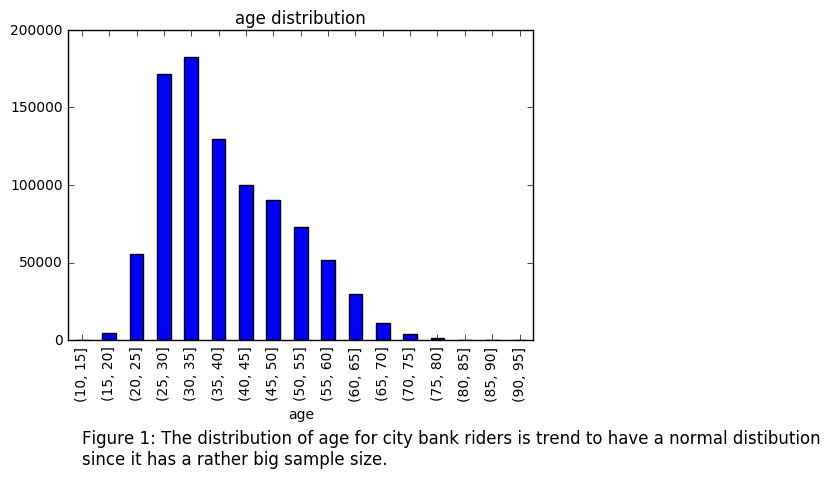

In [121]:
bins = np.arange(10, 99, 5)
ax_1 = df_1.age.groupby(pd.cut(df_1.age, bins)).agg([count_nonzero]).plot(kind='bar', legend=False)
ax_1.set_title("age distribution")
ax_1.text(0,-80000,'Figure 1: The distribution of age for city bank riders is trend to have a normal distibution \n' +
                    'since it has a rather big sample size.',
                    fontsize = 12)


In [28]:
np.random.seed(123123123)
ax_2 = np.random.normal(loc = age_mean, scale = age_std, size = len(df_1.age))
ax_2

array([ 47.99170466,  47.65656627,  20.46238649, ...,  43.74869154,
        37.63221391,  32.49053042])

In [29]:
import scipy.stats

# KS tests to compare 2 samples - Normal Distribution
http://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.ks_2samp.html

In [63]:
ks_n = scipy.stats.ks_2samp(df_1.age, ax_2)

pvalue_n = ks_n.pvalue
D_n = ks_n.statistic
print (ks_n)

Ks_2sampResult(statistic=0.10714108190466459, pvalue=0.0)


In [64]:
alpha = 0.05

def report_ks(p, alpha, d):
    print('NULL HYPOTHESIS: The distribution of age is normal distribution with the same mean and standard deviation'
          + '. Significance level p = 0.05.')
    print('Result:')
    if p < alpha:
        print ( 'We can reject the null hypothesis since the pvalue: %.10f is less than alpha: %.2f, '%(p, alpha) +
              'which means that the distribution of age is not normal distribution and the difference is %.3f.'%(d)) 
    else:
        print ( 'We can not reject the null hypothesis since pvalue: %.10f is less than alpha: %.2f, '%(p, alpha) +
              'which means that two distributions are identified and the difference is %.3f.'%(d))
                                                                                    

report_ks(pvalue_n, alpha, D_n)

NULL HYPOTHESIS: The distribution of age is normal distribution with the same mean and standard deviation. Significance level p = 0.05.
Result:
We can reject the null hypothesis since the pvalue: 0.0000000000 is less than alpha: 0.05, which means that the distribution of age is not normal distribution and the difference is 0.107.


# AD test to compare 2 samples - Normal Distribution
http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.anderson.html#scipy.stats.anderson

In [65]:
ad_n = scipy.stats.anderson(df_1.age, dist='norm')

print (ad_n)

AndersonResult(statistic=13805.856181447394, critical_values=array([ 0.576,  0.656,  0.787,  0.918,  1.092]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))


In [78]:

def report_ad(anderson):
    k2 = anderson.statistic
    
    for i in range(0,5):
        alpha = anderson.significance_level[i]/100
        print('NULL HYPOTHESIS: The distribution of age is normal distribution with the same mean and standard deviation'
          + '. Significance level = %.2f. '%(alpha))
        print('Result:')
        
        if k2 > anderson.critical_values[i]:
            print ( 'We can reject the null hypothesis since the k2 value: '
                   + '%.2f is larger than alpha: %.2f, '%(k2, alpha) 
                   + 'which means that the distribution of age is not normal distribution.') 
        else:
            print ( 'We can not reject the null hypothesis since pvalue: ' +
                   '%.2f is larger than alpha: %.2f, '%(k2, alpha) 
                   + 'which means that the distribution of age is normal distribution.')
        print()
                                                                                    

report_ad(ad_n)

NULL HYPOTHESIS: The distribution of age is normal distribution with the same mean and standard deviation. Significance level = 0.15. 
Result:
We can reject the null hypothesis since the k2 value: 13805.86 is larger than alpha: 0.15, which means that the distribution of age is not normal distribution.

NULL HYPOTHESIS: The distribution of age is normal distribution with the same mean and standard deviation. Significance level = 0.10. 
Result:
We can reject the null hypothesis since the k2 value: 13805.86 is larger than alpha: 0.10, which means that the distribution of age is not normal distribution.

NULL HYPOTHESIS: The distribution of age is normal distribution with the same mean and standard deviation. Significance level = 0.05. 
Result:
We can reject the null hypothesis since the k2 value: 13805.86 is larger than alpha: 0.05, which means that the distribution of age is not normal distribution.

NULL HYPOTHESIS: The distribution of age is normal distribution with the same mean and s

# KS tests to compare 2 samples - Gumbel Distribution
http://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.ks_2samp.html

In [67]:
np.random.seed(123123123)
ax_3 = numpy.random.gumbel(loc = age_mean, scale = age_std, size = len(df_1.age))
ax_3

array([ 35.17046846,  34.81142008,  47.16324114, ...,  57.71978467,
        45.02518916,  36.38666546])

In [69]:
ks_g = scipy.stats.ks_2samp(df_1.age, ax_3)

pvalue_g = ks_g.pvalue
D_g = ks_g.statistic
print (ks_g)

Ks_2sampResult(statistic=0.22995081248379462, pvalue=0.0)


In [70]:
alpha = 0.05

def report_ks(p, alpha, d):
    print('NULL HYPOTHESIS: The distribution of age is normal distribution with the same mean and standard deviation'
          + '. Significance level p = 0.05.')
    print('Result:')
    if p < alpha:
        print ( 'We can reject the null hypothesis since the pvalue: %.10f is less than alpha: %.2f, '%(p, alpha) +
              'which means that the distribution of age is not normal distribution and the difference is %.3f.'%(d)) 
    else:
        print ( 'We can not reject the null hypothesis since pvalue: %.10f is less than alpha: %.2f, '%(p, alpha) +
              'which means that two distributions are identified and the difference is %.3f.'%(d))
                                                                                    

report_ks(pvalue_g, alpha, D_g)

NULL HYPOTHESIS: The distribution of age is normal distribution with the same mean and standard deviation. Significance level p = 0.05.
Result:
We can reject the null hypothesis since the pvalue: 0.0000000000 is less than alpha: 0.05, which means that the distribution of age is not normal distribution and the difference is 0.230.


# AD test to compare 2 samples - Gumbel Distribution
http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.anderson.html#scipy.stats.anderson

In [73]:
ad_g = scipy.stats.anderson(df_1.age, dist='gumbel')

print (ad_g)

AndersonResult(statistic=inf, critical_values=array([ 0.474,  0.637,  0.757,  0.877,  1.038]), significance_level=array([ 25. ,  10. ,   5. ,   2.5,   1. ]))


In [81]:
def report_ad(anderson):
    k2 = anderson.statistic
    
    for i in range(0,5):
        alpha = anderson.significance_level[i]/100
        print('NULL HYPOTHESIS: The distribution of age is normal distribution with the same mean and standard deviation'
          + '. Significance level = %.2f. '%(alpha))
        print('Result:')
        
        if k2 > anderson.critical_values[i] :
            print ( 'We can reject the null hypothesis since the k2 value: '
                   + '%.2f is larger than alpha: %.2f, '%(k2, alpha) 
                   + 'which means that the distribution of age is not normal distribution.') 
        else:
            print ( 'We can not reject the null hypothesis since pvalue: ' +
                   '%.2f is larger than alpha: %.2f, '%(k2, alpha) 
                   + 'which means that the distribution of age is normal distribution.')
        print()
                                                                                    

report_ad(ad_g)

NULL HYPOTHESIS: The distribution of age is normal distribution with the same mean and standard deviation. Significance level = 0.25. 
Result:
We can reject the null hypothesis since the k2 value: inf is larger than alpha: 0.25, which means that the distribution of age is not normal distribution.

NULL HYPOTHESIS: The distribution of age is normal distribution with the same mean and standard deviation. Significance level = 0.10. 
Result:
We can reject the null hypothesis since the k2 value: inf is larger than alpha: 0.10, which means that the distribution of age is not normal distribution.

NULL HYPOTHESIS: The distribution of age is normal distribution with the same mean and standard deviation. Significance level = 0.05. 
Result:
We can reject the null hypothesis since the k2 value: inf is larger than alpha: 0.05, which means that the distribution of age is not normal distribution.

NULL HYPOTHESIS: The distribution of age is normal distribution with the same mean and standard deviati

# Extra Credit
I use latitude 40.756 as the threshold to divide the sample into two group, and then use KS - 2 sample test to test two age distribution.

In [101]:
df_1['start station latitude']
a = df_1
abol_1 = df_1['start station latitude'] < 40.756
abol_2 = df_1['start station latitude'] >= 40.756
df_dt = a[abol_1]
df_ut = a[abol_2]


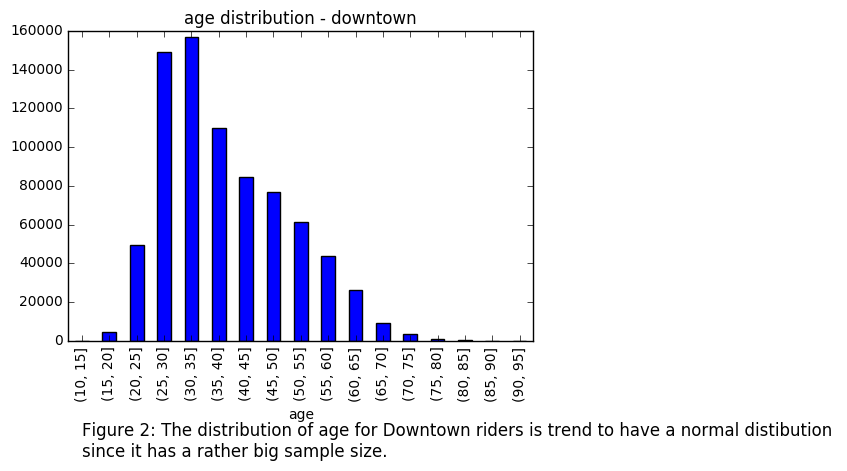

In [112]:
bins = np.arange(10, 99, 5)
ax_2 = df_dt.age.groupby(pd.cut(df_dt.age, bins)).agg([count_nonzero]).plot(kind='bar', legend=False)
ax_2.set_title("age distribution - downtown")
ax_2.text(0,-60000,'Figure 2: The distribution of age for Downtown riders is trend to have a normal distibution \n' +
                    'since it has a rather big sample size.',
                    fontsize = 12)


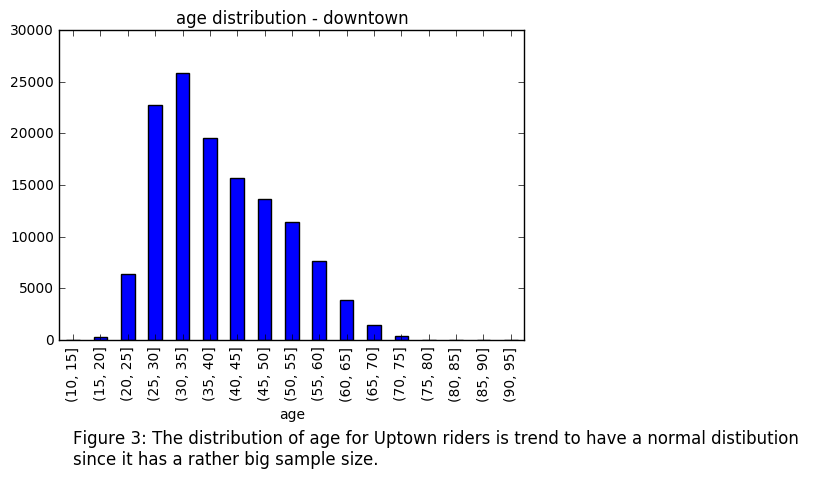

In [110]:
bins = np.arange(10, 99, 5)
ax_3 = df_ut.age.groupby(pd.cut(df_ut.age, bins)).agg([count_nonzero]).plot(kind='bar', legend=False)
ax_3.set_title("age distribution - downtown")
ax_3.text(0,-12000,'Figure 3: The distribution of age for Uptown riders is trend to have a normal distibution \n' +
                    'since it has a rather big sample size.',
                    fontsize = 12)

# KS tests to compare 2 samples

In [117]:
df_ut['age'].dropna(inplace= True)
df_dt['age'].dropna(inplace= True)
ks = scipy.stats.ks_2samp(df_dt.age, df_ut.age)
p = ks.pvalue
d = ks.statistic

In [119]:
def report_ks_1(p, alpha, d):
    print('NULL HYPOTHESIS: Two distribution of age for downtown and uptown are from the same distribution'
          + '. Significance level p = 0.05.')
    print('Result:')
    if p < alpha:
        print ( 'We can reject the null hypothesis since the pvalue: %.10f is less than alpha: %.2f, '%(p, alpha) +
              'which means that the distribution of age is not normal distribution and the difference is %.3f.'%(d)) 
    else:
        print ( 'We can not reject the null hypothesis since pvalue: %.10f is less than alpha: %.2f, '%(p, alpha) +
              'which means that two distributions are identified and the difference is %.3f.'%(d))
                                                                                    
report_ks_1(p, alpha, d)

NULL HYPOTHESIS: Two distribution of age for downtown and uptown are from the same distribution. Significance level p = 0.05.
Result:
We can reject the null hypothesis since the pvalue: 0.0000000000 is less than alpha: 0.05, which means that the distribution of age is not normal distribution and the difference is 0.037.
